# XBeach generate inputs

In [3]:
import sys;sys.path.append('../xbeach/')
from importlib import reload
from libs import *
from scipy.io import loadmat
import xbeach
import utils
from xbeach_inputs import *
from datetime import datetime,timedelta

In [78]:
root = pl.Path(r'Z:\Users\Tyler\projects\dunex\cross_sect')
xs = pd.read_csv(str(root / 'duck_xs3.csv'))

In [85]:
x = np.array(xs['X'])
y= np.array(xs['Graphic Profile 1'])

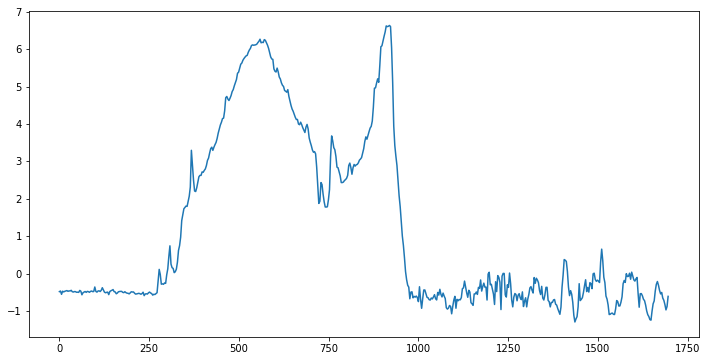

In [86]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(x,y)

In [83]:
len(x)

569

In [39]:
xx = np.arange(x[0],x.iloc[-1],25)

In [40]:
zgr = np.interp(xx,x,y)

In [87]:
np.savetxt(str(root / 'x.grd'),x.reshape(1,569),fmt='%.4e',delimiter='    ')
np.savetxt(str(root / 'bed.dep'),y.reshape(1,569),fmt='%.4e',delimiter='    ')

In [5]:
wr = pl.Path(r'Z:\Users\Tyler\projects\dewberry\irene')
f = nc4.Dataset(str(wr / 'swan_HS.63.nc'),'r')

In [89]:
wl = f.variables['zeta'][:,48502]

In [91]:
write_tide(root,dt2,wl,wl)

In [6]:
t = nc4.Dataset(str(wr / 'swan_TPS.63.nc'),'r')

In [7]:
wl = f.variables['swan_HS'][:,48502]

In [8]:
tp = t.variables['swan_TPS'][:,48502]

In [53]:
start = '20180907'
step = '1H'

In [54]:
dt = pd.date_range(start=start,periods=len(wl),freq='1H')

In [9]:
dt2 = np.arange(3600,(len(wl)*3600+3600),3600)

In [10]:
write_waves(wr,wl,tp,3600,864000,mainang=90.0)

In [66]:
wl2 = pd.DataFrame({'time':dt2,'surge':wl})

In [67]:
wl2.to_csv('tide.txt',sep='\t')

In [3]:
write_spatial_vege(root,'med_res.dep')

In [4]:
temp = pd.read_csv(str(root / 'med_res.dep'), sep='\s+')

In [5]:
(1.).is_integer()

True